In [291]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [292]:
df1 = pd.read_csv("coin_gecko_2022-03-16.csv")
df2 = pd.read_csv("coin_gecko_2022-03-17.csv")

In [293]:
df1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [295]:
df1.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

In [296]:
nan_rows = df1[df1.isna().any(axis=1)]

In [297]:
nan_rows.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
310,BNB48 Club Token,KOGE,75.360000,NaN,NaN,NaN,NaN,151006279.0,2022-03-16
416,cBAT,CBAT,0.013888,NaN,NaN,NaN,NaN,96585801.0,2022-03-16
472,Sai,SAI,1.000000,NaN,NaN,NaN,NaN,72643253.0,2022-03-16


In [298]:
df1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


## Fill na values with the mean values

In [299]:
df1.fillna(df1.mean(numeric_only=True), inplace=True)

In [300]:
df1[df1["coin"] == "cBAT"]

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
416,cBAT,CBAT,0.013888,0.018746,0.028849,0.039016,3.276644e+08,96585801.0,2022-03-16


In [301]:
print(df1.dtypes)

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object


In [302]:
print(df1.duplicated().sum())

0


In [303]:
print(df1[['1h', '24h', '7d']].describe())

               1h         24h          7d
count  500.000000  500.000000  500.000000
mean     0.018746    0.028849    0.039016
std      0.013825    0.057890    0.203075
min     -0.039000   -0.141000   -0.547000
25%      0.011000    0.004750   -0.019250
50%      0.018373    0.022000    0.006000
75%      0.025250    0.040000    0.048250
max      0.086000    0.573000    2.935000


In [304]:
print(df1['date'].unique())

['2022-03-16']


In [305]:
df1['24h_volume_log'] = np.log1p(df1['24h_volume'])  # log(1 + x)
df1['mkt_cap_log'] = np.log1p(df1['mkt_cap'])

In [306]:
from sklearn.preprocessing import MinMaxScaler

In [307]:
scaler = MinMaxScaler()
df1[['24h_volume_minmax', 'mkt_cap_minmax']] = scaler.fit_transform(df1[['24h_volume', 'mkt_cap']])

In [308]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['24h_volume_std', 'mkt_cap_std']] = scaler.fit_transform(df1[['24h_volume', 'mkt_cap']])

In [309]:
df1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,24h_volume_log,mkt_cap_log,24h_volume_minmax,mkt_cap_minmax,24h_volume_std,mkt_cap_std
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,24.289717,27.370943,0.610870,1.000000,11.062627,20.295096
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,23.706353,26.513545,0.340877,0.424216,6.127457,8.553800
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,24.782587,25.104857,1.000000,0.103641,18.175464,2.016697
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,21.056772,24.882833,0.024093,0.082989,0.337020,1.595560
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,22.077108,24.678772,0.066838,0.067654,1.118346,1.282864


## Liquidity Ratio
### A higher ratio generally means more liquidity

In [310]:
df1['liquidity_ratio'] = df1['24h_volume'] / df1['mkt_cap']

## Volatility Metrics
### Higher values suggest more volatile (and potentially less liquid) assets.

In [311]:
df1['volatility_score'] = df1[['1h', '24h', '7d']].std(axis=1)

## Average Price Change

In [312]:
df1['avg_pct_change'] = df1[['1h', '24h', '7d']].mean(axis=1)

## Volume to Price Ratio
### High values suggest more frequent trading relative to price.

In [313]:
df1['volume_price_ratio'] = df1['24h_volume'] / df1['price']

## Relative Market Cap

In [314]:
df1['relative_mkt_cap'] = df1['mkt_cap'] / df1['mkt_cap'].sum()

In [315]:
print(df1.describe())

              price          1h         24h          7d    24h_volume  \
count  5.000000e+02  500.000000  500.000000  500.000000  5.000000e+02   
mean   6.527851e+02    0.018746    0.028849    0.039016  3.276644e+08   
std    4.578529e+03    0.013825    0.057890    0.203075  3.172684e+09   
min    1.544000e-09   -0.039000   -0.141000   -0.547000  0.000000e+00   
25%    1.904625e-01    0.011000    0.004750   -0.019250  1.847484e+06   
50%    1.085000e+00    0.018373    0.022000    0.006000  8.967683e+06   
75%    6.925000e+00    0.025250    0.040000    0.048250  4.109914e+07   
max    4.121727e+04    0.086000    0.573000    2.935000  5.793497e+10   

            mkt_cap  24h_volume_log  mkt_cap_log  24h_volume_minmax  \
count  5.000000e+02      500.000000   500.000000         500.000000   
mean   3.722677e+09       15.884242    19.594177           0.005656   
std    3.784349e+10        2.813548     1.458532           0.054763   
min    6.577043e+07        0.000000    18.001681          

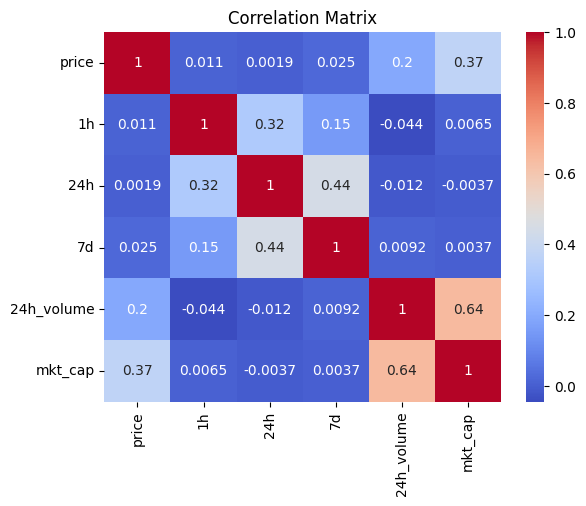

In [316]:
corr = df1[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [317]:
from sklearn.cluster import KMeans

features = df1[['price', '24h_volume', 'mkt_cap']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
df1['cluster'] = kmeans.labels_

<Axes: xlabel='price', ylabel='mkt_cap'>

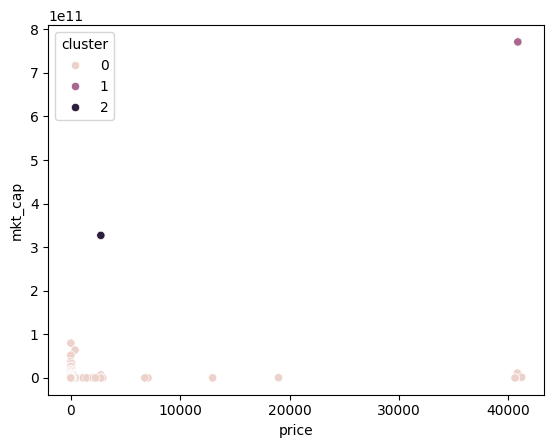

In [318]:
sns.scatterplot(data=df1, x='price', y='mkt_cap', hue='cluster')

In [319]:
df1.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,24h_volume_log,...,24h_volume_minmax,mkt_cap_minmax,24h_volume_std,mkt_cap_std,liquidity_ratio,volatility_score,avg_pct_change,volume_price_ratio,relative_mkt_cap,cluster
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,24.289717,...,0.610870,1.000000,11.062627,20.295096,0.045903,0.017214,0.035667,8.661584e+05,0.414213,1
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,23.706353,...,0.340877,0.424216,6.127457,8.553800,0.060374,0.021378,0.041000,7.195971e+06,0.175736,2
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,24.782587,...,1.000000,0.103641,18.175464,2.016697,0.724503,0.000577,-0.000667,5.793497e+10,0.042961,0
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,21.056772,...,0.024093,0.082989,0.337020,1.595560,0.021795,0.012055,0.016667,3.640440e+06,0.034407,0
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,22.077108,...,0.066838,0.067654,1.118346,1.282864,0.074150,0.000577,-0.000333,3.872762e+09,0.028056,0


In [320]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coin                500 non-null    object 
 1   symbol              500 non-null    object 
 2   price               500 non-null    float64
 3   1h                  500 non-null    float64
 4   24h                 500 non-null    float64
 5   7d                  500 non-null    float64
 6   24h_volume          500 non-null    float64
 7   mkt_cap             500 non-null    float64
 8   date                500 non-null    object 
 9   24h_volume_log      500 non-null    float64
 10  mkt_cap_log         500 non-null    float64
 11  24h_volume_minmax   500 non-null    float64
 12  mkt_cap_minmax      500 non-null    float64
 13  24h_volume_std      500 non-null    float64
 14  mkt_cap_std         500 non-null    float64
 15  liquidity_ratio     500 non-null    float64
 16  volatili

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, mean_absolute_error

In [322]:
# Final feature list (you can modify or expand)
features = ["price", "1h", "24h", "7d", "24h_volume", "mkt_cap", "liquidity_ratio", "volatility_score"]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df1[features])

In [323]:
# Target variable: next-day price (or just use current price)
y = df1["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 169.73085755056766
MSE: 750406.9477004287
R²: 0.9847099714330038


In [324]:
# Create binary target: 1 if 24h change is positive, else 0
df1["price_increase"] = (df1["24h"] > 0).astype(int)
y = df1["price_increase"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        82

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



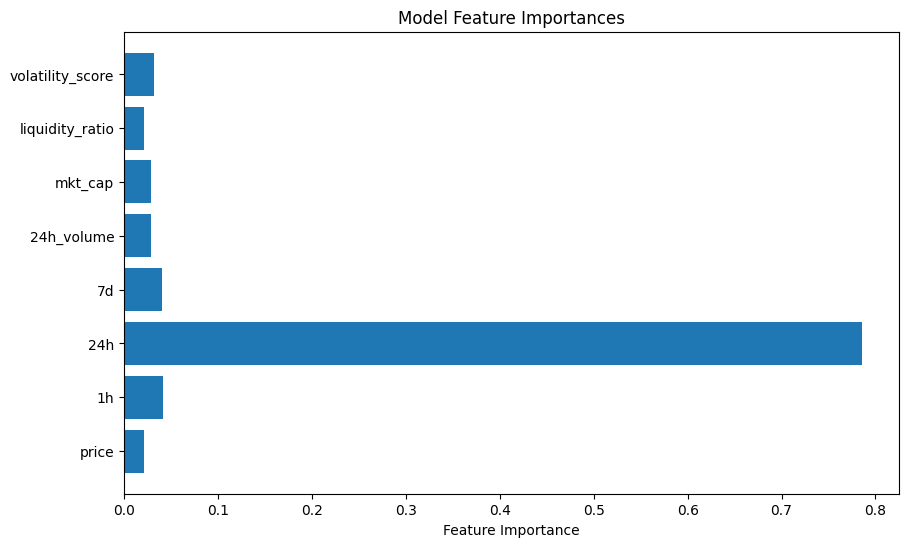

In [325]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = df1[features].columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Model Feature Importances")
plt.show()

In [326]:
df2.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [327]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [328]:
df2.isnull().sum()

coin          0
symbol        0
price         0
1h            4
24h           4
7d            5
24h_volume    4
mkt_cap       0
date          0
dtype: int64

In [329]:
nan_rows = df2[df2.isna().any(axis=1)]

In [330]:
nan_rows.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
103,ApeCoin,APE,7.720000,0.05,-0.255,NaN,1.129583e+09,794922002.0,2022-03-17
272,Interest Bearing Bitcoin,IBBTC,40853.810000,NaN,NaN,NaN,NaN,189800862.0,2022-03-17
314,BNB48 Club Token,KOGE,75.360000,NaN,NaN,NaN,NaN,151006279.0,2022-03-17
418,cBAT,CBAT,0.013888,NaN,NaN,NaN,NaN,96581377.0,2022-03-17
475,Sai,SAI,1.000000,NaN,NaN,NaN,NaN,72643253.0,2022-03-17


## Fill na with mean values >>

In [331]:
df2.fillna(df2.mean(numeric_only=True), inplace=True)

In [332]:
df2[df2["coin"] == "cBAT"]

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
418,cBAT,CBAT,0.013888,0.000681,0.018615,0.008038,2.508801e+08,96581377.0,2022-03-17


In [333]:
print(df2.dtypes)

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object


In [334]:
print(df2.duplicated().sum())

0


In [335]:
print(df2[['1h', '24h', '7d']].describe())

               1h         24h          7d
count  500.000000  500.000000  500.000000
mean     0.000681    0.018615    0.008038
std      0.032995    0.059900    0.251280
min     -0.704000   -0.646000   -0.558000
25%     -0.001000    0.000000   -0.051000
50%      0.001000    0.012000   -0.014000
75%      0.004000    0.030000    0.020000
max      0.095000    0.577000    4.608000


In [336]:
print(df2['date'].unique())

['2022-03-17']


In [337]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          500 non-null    float64
 4   24h         500 non-null    float64
 5   7d          500 non-null    float64
 6   24h_volume  500 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [338]:
df2['24h_volume_log'] = np.log1p(df2['24h_volume'])  # log(1 + x)
df2['mkt_cap_log'] = np.log1p(df2['mkt_cap'])

In [339]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[['24h_volume_minmax', 'mkt_cap_minmax']] = scaler.fit_transform(df2[['24h_volume', 'mkt_cap']])

In [340]:
scaler

MinMaxScaler()

In [341]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[['24h_volume_std', 'mkt_cap_std']] = scaler.fit_transform(df2[['24h_volume', 'mkt_cap']])

In [342]:
scaler

StandardScaler()

In [343]:
df2.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,24h_volume_log,mkt_cap_log,24h_volume_minmax,mkt_cap_minmax,24h_volume_std,mkt_cap_std
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17,23.742525,27.377518,0.463981,1.000000,8.892209,20.200734
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17,23.336302,26.549494,0.309086,0.436863,5.886828,8.770143
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17,24.510437,25.107863,1.000000,0.103270,19.292469,1.998860
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17,21.077686,24.906249,0.032298,0.084398,0.516368,1.615799
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17,21.995780,24.685907,0.080891,0.067691,1.459200,1.276672


## Liquidity ratio >> 

In [344]:
df2['liquidity_ratio'] = df2['24h_volume'] / df2['mkt_cap']

## Volatility metrics >>

In [345]:
df2['volatility_score'] = df2[['1h', '24h', '7d']].std(axis=1)

## Average price change >>

In [346]:
df2['avg_pct_change'] = df2[['1h', '24h', '7d']].mean(axis=1)

## Volume to price ratio >>

In [347]:
df2['volume_price_ratio'] = df2['24h_volume'] / df2['price']

## Relative Market Cap >>

In [348]:
df2['relative_mkt_cap'] = df2['mkt_cap'] / df2['mkt_cap'].sum()

In [349]:
print(df2.describe())

              price          1h         24h          7d    24h_volume  \
count  5.000000e+02  500.000000  500.000000  500.000000  5.000000e+02   
mean   6.594269e+02    0.000681    0.018615    0.008038  2.508801e+08   
std    4.595355e+03    0.032995    0.059900    0.251280  2.276768e+09   
min    1.484000e-09   -0.704000   -0.646000   -0.558000  4.349000e+01   
25%    2.043850e-01   -0.001000    0.000000   -0.051000  1.825090e+06   
50%    1.100000e+00    0.001000    0.012000   -0.014000  8.084770e+06   
75%    7.435000e+00    0.004000    0.030000    0.020000  4.061222e+07   
max    4.090907e+04    0.095000    0.577000    4.608000  4.413140e+10   

            mkt_cap  24h_volume_log  mkt_cap_log  24h_volume_minmax  \
count  5.000000e+02      500.000000   500.000000         500.000000   
mean   3.787932e+09       15.828255    19.621767           0.005685   
std    3.826905e+10        2.651811     1.458592           0.051591   
min    6.731896e+07        3.795264    18.024953          

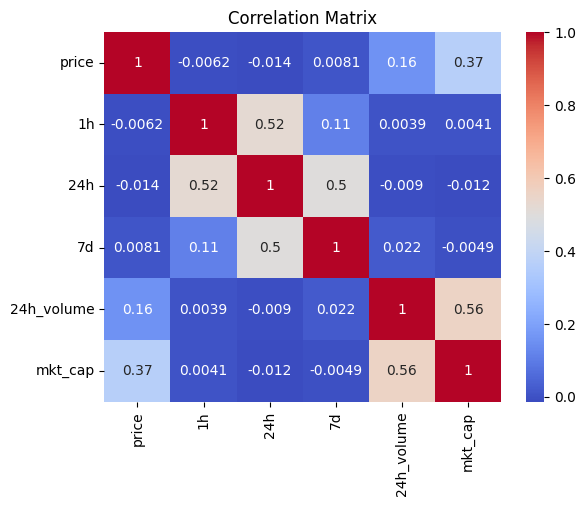

In [350]:
corr = df2[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [351]:
from sklearn.cluster import KMeans

features = df2[['price', '24h_volume', 'mkt_cap']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
df2['cluster'] = kmeans.labels_

In [352]:
kmeans

KMeans(n_clusters=3, random_state=0)

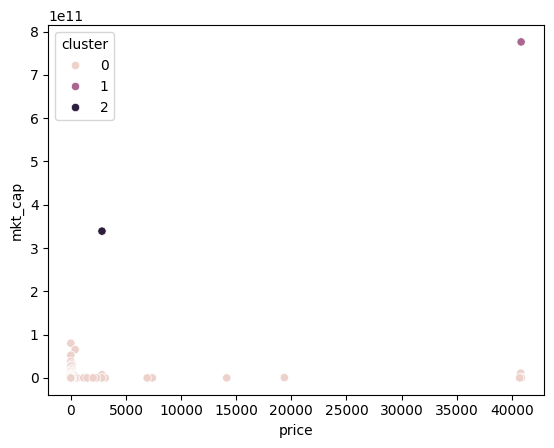

In [353]:
sns.scatterplot(data=df2, x='price', y='mkt_cap', hue='cluster')
plt.show()

In [354]:
df2.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,24h_volume_log,...,24h_volume_minmax,mkt_cap_minmax,24h_volume_std,mkt_cap_std,liquidity_ratio,volatility_score,avg_pct_change,volume_price_ratio,relative_mkt_cap,cluster
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17,23.742525,...,0.463981,1.000000,8.892209,20.200734,0.026384,0.015885,-0.008667,5.012344e+05,0.409763,1
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17,23.336302,...,0.309086,0.436863,5.886828,8.770143,0.040228,0.016073,0.022333,4.829455e+06,0.179030,2
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17,24.510437,...,1.000000,0.103270,19.292469,1.998860,0.550227,0.000000,0.000000,4.413140e+10,0.042348,0
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17,21.077686,...,0.032298,0.084398,0.516368,1.615799,0.021741,0.013013,0.002667,3.658412e+06,0.034616,0
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17,21.995780,...,0.080891,0.067691,1.459200,1.276672,0.067872,0.000577,-0.000333,3.570748e+09,0.027770,0


In [355]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coin                500 non-null    object 
 1   symbol              500 non-null    object 
 2   price               500 non-null    float64
 3   1h                  500 non-null    float64
 4   24h                 500 non-null    float64
 5   7d                  500 non-null    float64
 6   24h_volume          500 non-null    float64
 7   mkt_cap             500 non-null    float64
 8   date                500 non-null    object 
 9   24h_volume_log      500 non-null    float64
 10  mkt_cap_log         500 non-null    float64
 11  24h_volume_minmax   500 non-null    float64
 12  mkt_cap_minmax      500 non-null    float64
 13  24h_volume_std      500 non-null    float64
 14  mkt_cap_std         500 non-null    float64
 15  liquidity_ratio     500 non-null    float64
 16  volatili

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, mean_absolute_error

In [357]:
# Final feature list (can modify or expand)
features = ["price", "1h", "24h", "7d", "24h_volume", "mkt_cap", "liquidity_ratio", "volatility_score"]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])

In [358]:
scaler

StandardScaler()

In [359]:
# Target variable: next-day price (or just use current price)
y = df2["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 86.09268290734157
MSE: 139200.98821092668
R²: 0.9971306187366865


In [360]:
# Create binary target: 1 if 24h change is positive, else 0
df2["price_increase"] = (df2["24h"] > 0).astype(int)
y = df2["price_increase"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        68

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



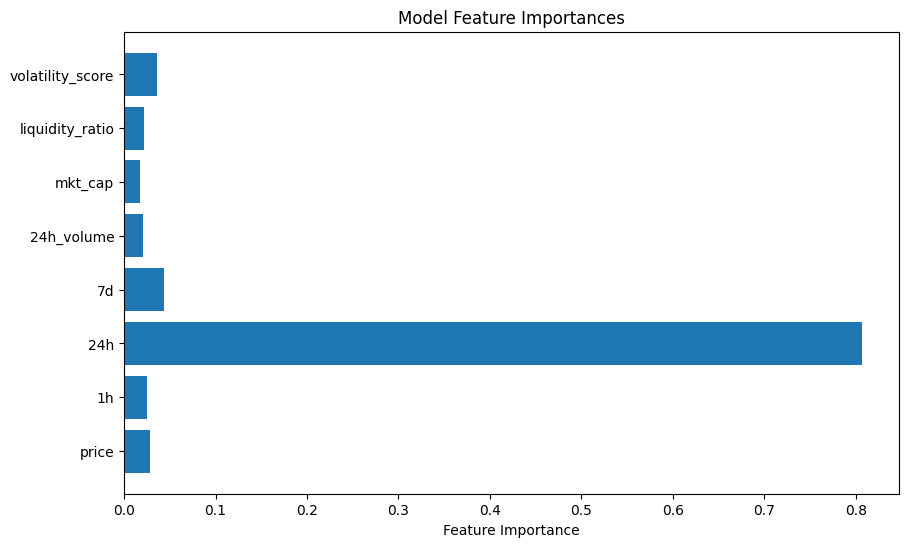

In [361]:
importances = model.feature_importances_
feature_names = df2[features].columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Model Feature Importances")
plt.show()

In [362]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,24h_volume_log,...,mkt_cap_minmax,24h_volume_std,mkt_cap_std,liquidity_ratio,volatility_score,avg_pct_change,volume_price_ratio,relative_mkt_cap,cluster,price_increase
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,24.289717,...,1.000000,11.062627,20.295096,0.045903,0.017214,0.035667,8.661584e+05,0.414213,1,1
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,23.706353,...,0.424216,6.127457,8.553800,0.060374,0.021378,0.041000,7.195971e+06,0.175736,2,1
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,24.782587,...,0.103641,18.175464,2.016697,0.724503,0.000577,-0.000667,5.793497e+10,0.042961,0,0
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,21.056772,...,0.082989,0.337020,1.595560,0.021795,0.012055,0.016667,3.640440e+06,0.034407,0,1
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,22.077108,...,0.067654,1.118346,1.282864,0.074150,0.000577,-0.000333,3.872762e+09,0.028056,0,0


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coin                1000 non-null   object 
 1   symbol              1000 non-null   object 
 2   price               1000 non-null   float64
 3   1h                  1000 non-null   float64
 4   24h                 1000 non-null   float64
 5   7d                  1000 non-null   float64
 6   24h_volume          1000 non-null   float64
 7   mkt_cap             1000 non-null   float64
 8   date                1000 non-null   object 
 9   24h_volume_log      1000 non-null   float64
 10  mkt_cap_log         1000 non-null   float64
 11  24h_volume_minmax   1000 non-null   float64
 12  mkt_cap_minmax      1000 non-null   float64
 13  24h_volume_std      1000 non-null   float64
 14  mkt_cap_std         1000 non-null   float64
 15  liquidity_ratio     1000 non-null   float64
 16  volatil

# EDA >>

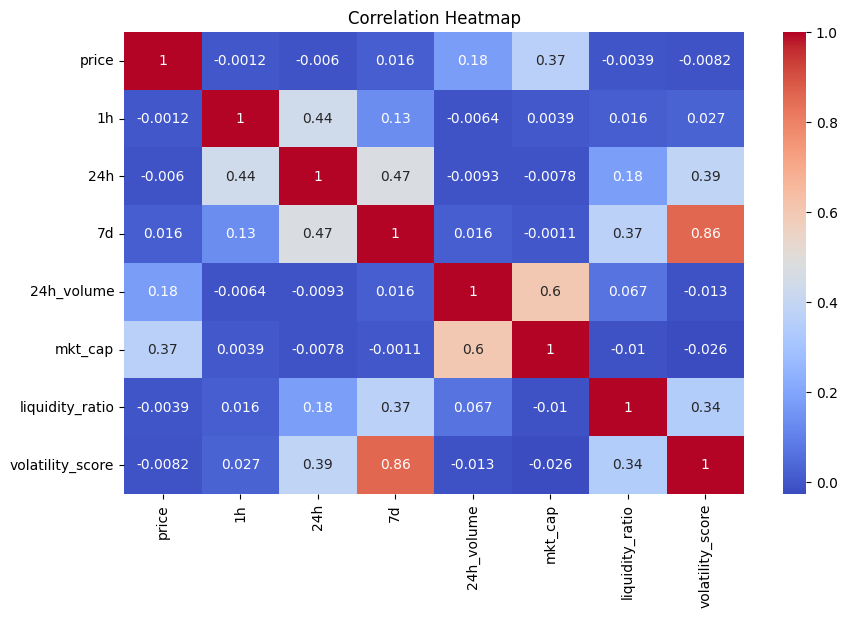

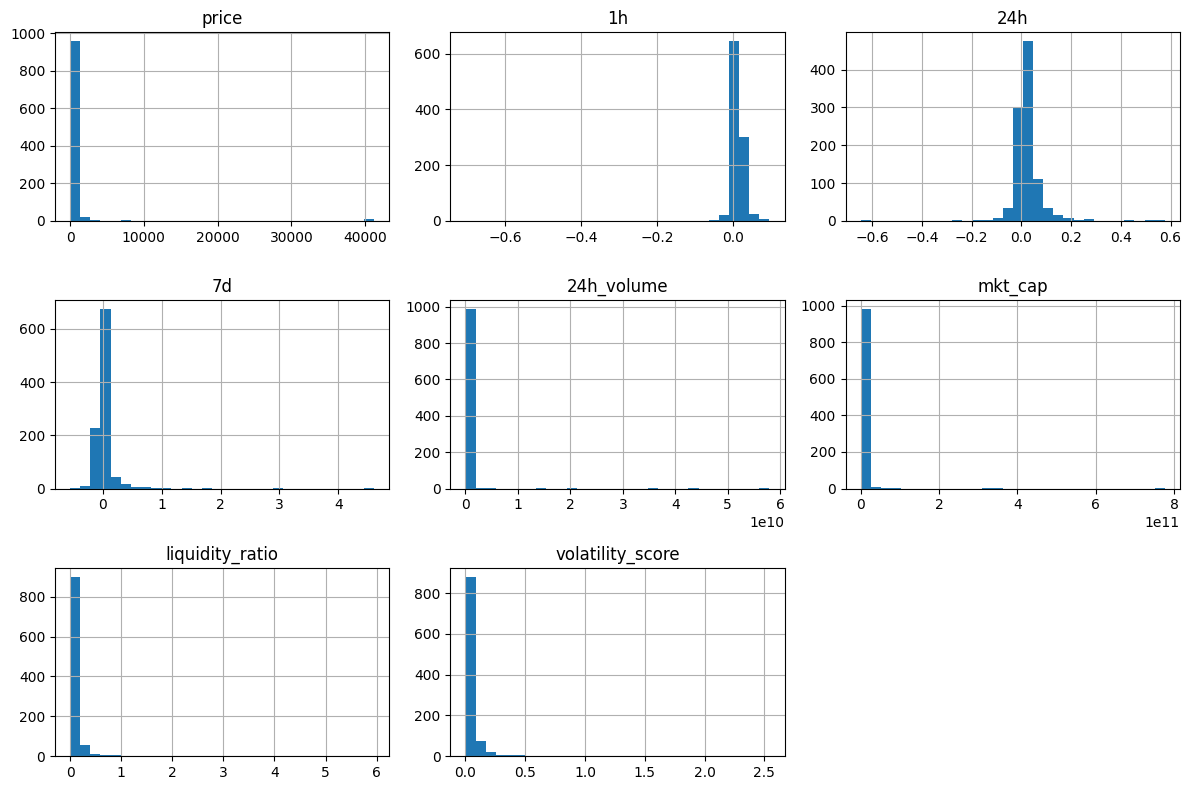

In [364]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of key features
df[features].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coin                1000 non-null   object 
 1   symbol              1000 non-null   object 
 2   price               1000 non-null   float64
 3   1h                  1000 non-null   float64
 4   24h                 1000 non-null   float64
 5   7d                  1000 non-null   float64
 6   24h_volume          1000 non-null   float64
 7   mkt_cap             1000 non-null   float64
 8   date                1000 non-null   object 
 9   24h_volume_log      1000 non-null   float64
 10  mkt_cap_log         1000 non-null   float64
 11  24h_volume_minmax   1000 non-null   float64
 12  mkt_cap_minmax      1000 non-null   float64
 13  24h_volume_std      1000 non-null   float64
 14  mkt_cap_std         1000 non-null   float64
 15  liquidity_ratio     1000 non-null   float64
 16  volatil

In [366]:
df.drop(['date', 'symbol', '24h_volume_log', 'mkt_cap_log', '24h_volume_minmax', 'mkt_cap_minmax', '24h_volume_std', 'mkt_cap_std', 'avg_pct_change', 'volume_price_ratio', 'relative_mkt_cap', 'cluster', 'price_increase'], axis=1, inplace=True)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coin              1000 non-null   object 
 1   price             1000 non-null   float64
 2   1h                1000 non-null   float64
 3   24h               1000 non-null   float64
 4   7d                1000 non-null   float64
 5   24h_volume        1000 non-null   float64
 6   mkt_cap           1000 non-null   float64
 7   liquidity_ratio   1000 non-null   float64
 8   volatility_score  1000 non-null   float64
dtypes: float64(8), object(1)
memory usage: 70.4+ KB


# Model Training & Evaluation >> 

In [368]:

# Define features and target
# Remove non-numeric columns before modeling
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Exclude the target from features
target = 'liquidity_ratio' if 'liquidity_ratio' in df.columns else numeric_cols[-1]
features = [col for col in numeric_cols if col != target]

X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train baseline model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.1681
MAE: 0.0374
R² Score: 0.7706


# HYperparameter Tuning >>

In [369]:

params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
y_pred_grid = grid.predict(X_test)

# Evaluation after tuning
print("Tuned R² Score:", r2_score(y_test, y_pred_grid))

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Tuned R² Score: 0.8069167158009142


In [370]:

import pickle

# Save the best estimator and the scaler
with open("model.pkl", "wb") as f:
    pickle.dump(grid.best_estimator_, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [371]:
streamlit_script = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.set_page_config(page_title="Liquidity Ratio Predictor", page_icon="💧")
st.title("💧 Liquidity Ratio Predictor")

with st.form("input_form"):
    coin = st.selectbox("Coin", ["Bitcoin", "Ethereum", "Tether", "Other"])
    price = st.number_input("Price", min_value=0.0)
    pct_change_1h = st.number_input("1h % Change", value=0.0, step=0.01)
    pct_change_24h = st.number_input("24h % Change", value=0.0, step=0.01)
    pct_change_7d = st.number_input("7d % Change", value=0.0, step=0.01)
    volume_24h = st.number_input("24h Volume (in USD)", min_value=0.0)
    market_cap = st.number_input("Market Cap (in USD)", min_value=0.0)
    submitted = st.form_submit_button("Predict")

if submitted:
    # Calculate volatility_score as in your notebook
    volatility_score = np.std([pct_change_1h, pct_change_24h, pct_change_7d])

    # DataFrame with features in expected order (including liquidity_ratio placeholder)
    X_input = pd.DataFrame([[price, pct_change_1h, pct_change_24h, pct_change_7d, volume_24h, market_cap, volatility_score]],
                       columns=["price", "1h", "24h", "7d", "24h_volume", "mkt_cap", "volatility_score"])


    # Scale and predict
    X_scaled = scaler.transform(X_input)
    prediction = model.predict(X_scaled)

    st.success(f"💧 Predicted Liquidity Ratio: {prediction[0]:.4f}")

'''

# Save to app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(streamlit_script)

print("Streamlit script saved as app.py")


Streamlit script saved as app.py


In [372]:
df.head()

,coin,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio,volatility_score
0,Bitcoin,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,0.045903,0.017214
1,Ethereum,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,0.060374,0.021378
2,Tether,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,0.724503,0.000577
3,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,0.021795,0.012055
4,USD Coin,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,0.074150,0.000577
